In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('heart.csv')

In [ ]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# number of rows and columns in the dataset
heart_data.shape

(1025, 14)

In [ ]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [ ]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


normalization

In [ ]:
for column in heart_data.columns:
	heart_data[column] = (heart_data[column] - heart_data[column].min()) / (heart_data[column].max() - heart_data[column].min())
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1.0,0.000000,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000,0.0
1,0.500000,1.0,0.000000,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000,0.0
2,0.854167,1.0,0.000000,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000,0.0
3,0.666667,1.0,0.000000,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000,0.0
4,0.687500,0.0,0.000000,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.625000,1.0,0.333333,0.433962,0.216895,0.0,0.5,0.709924,1.0,0.000000,1.0,0.00,0.666667,1.0
1021,0.645833,1.0,0.000000,0.292453,0.301370,0.0,0.0,0.534351,1.0,0.451613,0.5,0.25,1.000000,0.0
1022,0.375000,1.0,0.000000,0.150943,0.340183,0.0,0.0,0.358779,1.0,0.161290,0.5,0.25,0.666667,0.0
1023,0.437500,0.0,0.000000,0.150943,0.292237,0.0,0.0,0.671756,0.0,0.000000,1.0,0.00,0.666667,1.0


Spiltting the feature and traget

In [ ]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [ ]:
print(Y)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1020    1.0
1021    0.0
1022    0.0
1023    1.0
1024    0.0
Name: target, Length: 1025, dtype: float64


Splitting the Data into Training data & Test Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (820, 13) (205, 13)


Feature selection

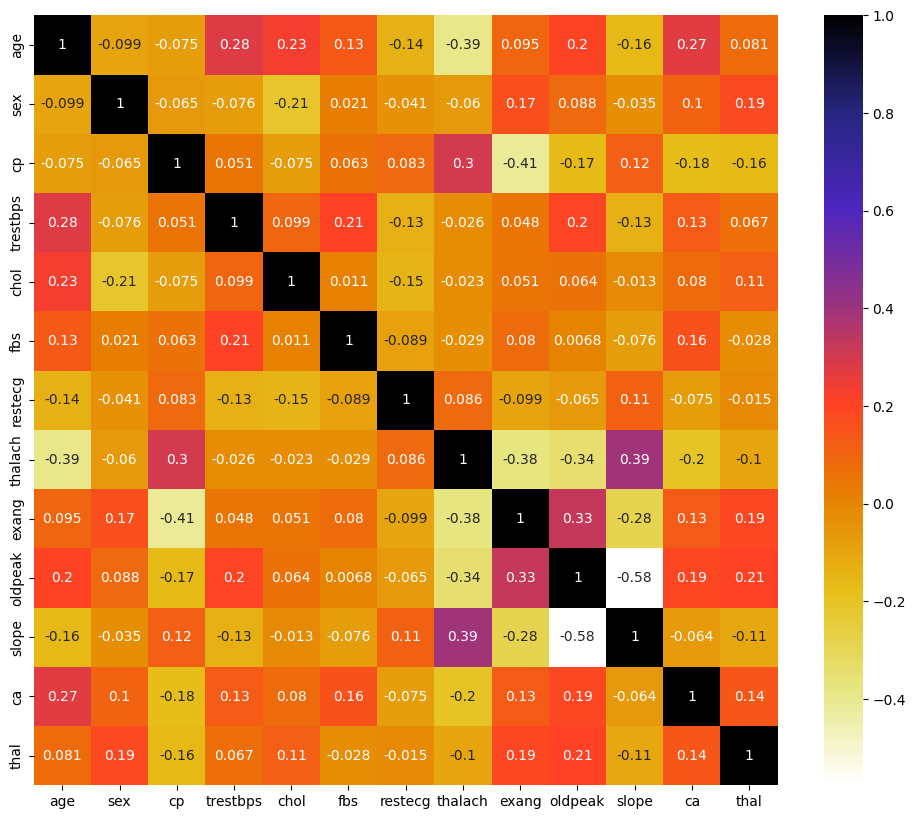

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.3)
len(set(corr_features))

2

In [ ]:
corr_features

{'oldpeak', 'slope'}

Function to plot Confusion Matrix

In [ ]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap();
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(conf_mat,
                   annot=True, # Annot the boxes with conf_mat info
                   cbar=False,
                   cmap = "OrRd")
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label");

Model Training Decision Tree Classifier

Training Accuracy of DecisionTreeClassifier Model is 1.0
Test Accuracy of DecisionTreeClassifier Model is 0.9853658536585366

Confusion Matrix


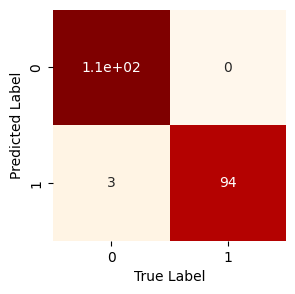

In [ ]:
from sklearn.tree import DecisionTreeClassifier

np.random.seed(42)

dtcModel=DecisionTreeClassifier()

dtcModel.fit(X_train,y_train)
y_preds=dtcModel.predict(X_test)

print(f"Training Accuracy of DecisionTreeClassifier Model is {dtcModel.score(X_train,y_train)}")
print(f"Test Accuracy of DecisionTreeClassifier Model is {dtcModel.score(X_test,y_test)}")
print("\nConfusion Matrix")
DT_accuracy_score = dtcModel.score(X_test,y_test)

conf_mat = confusion_matrix(y_test, y_preds)
plot_conf_mat(conf_mat)

Model Training Random Forest Classifier

Training Accuracy of RandomForestClassifier Model is 1.0
Test Accuracy of RandomForestClassifier Model is 0.9853658536585366

Confusion Matrix


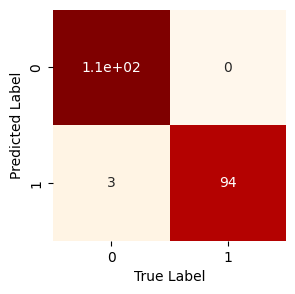

In [ ]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

rfcModel=RandomForestClassifier()

rfcModel.fit(X_train,y_train)
y_preds=rfcModel.predict(X_test)
print(f"Training Accuracy of RandomForestClassifier Model is {rfcModel.score(X_train,y_train)}")
print(f"Test Accuracy of RandomForestClassifier Model is {rfcModel.score(X_test,y_test)}")
print("\nConfusion Matrix")
RF_accuracy_score = rfcModel.score(X_test,y_test)

conf_mat = confusion_matrix(y_test, y_preds)
plot_conf_mat(conf_mat)

Model Training Logistic Regression

Training Accuracy of Logistic Regression Model is 0.8451219512195122
Test Accuracy of Logistic Regression Model is 0.8731707317073171

Confusion Matrix


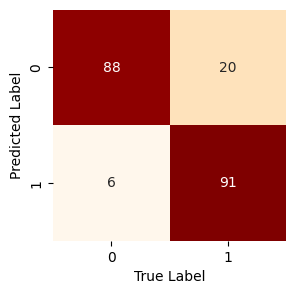

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
np.random.seed(42)

LRmodel= LogisticRegression()
LRmodel.fit(X_train, y_train)

y_preds=LRmodel.predict(X_test)

print(f"Training Accuracy of Logistic Regression Model is {LRmodel.score(X_train,y_train)}")
print(f"Test Accuracy of Logistic Regression Model is {LRmodel.score(X_test,y_test)}")
print("\nConfusion Matrix")
LR_accuracy_score = LRmodel.score(X_test,y_test)

conf_mat = confusion_matrix(y_test, y_preds)
plot_conf_mat(conf_mat)

In [ ]:
import pickle
pickle.dump(LRmodel, open('model_lr_heart.pkl','wb'))

In [ ]:
input_data = (57,1,2,128,229,0,0,150,0,0.4,1,1,3)
input_data_as_array = np.asarray(input_data)
std_data = input_data_as_array.reshape(1,-1)


dataset_heart = pd.read_csv('/content/heart.csv')
dataset_heart.head()


print("Accuracy of Logical Regression Algorithm is ",LR_accuracy_score)
print("Accuracy of Decision Tree Algorithm is ",DT_accuracy_score)
print("Accuracy of Random Forest Algorithm is ",RF_accuracy_score)
highestscore = max(LR_accuracy_score,DT_accuracy_score,RF_accuracy_score)
print("Among the 3 algorithms used Random Forest algorithm has the highest accuracy score of ",highestscore)
print("Therefore we will use the Random Forest algorithm for Diabetes_Prediction moving forward \n\n")

print("To test the algorithm we will use an input from the dataset for demonstration")
print(std_data)
prediction = rfcModel.predict(std_data)
print(prediction)
if(prediction == [1]):
  print("\n\n patient has Heart Disease")
elif(prediction == [0]):
  print("\n\n patient does not have Heart Disease")

Accuracy of Logical Regression Algorithm is  0.8292682926829268
Accuracy of Decision Tree Algorithm is  1.0
Accuracy of Random Forest Algorithm is  1.0
Among the 3 algorithms used Random Forest algorithm has the highest accuracy score of  1.0
Therefore we will use the Random Forest algorithm for Diabetes_Prediction moving forward 


To test the algorithm we will use an input from the dataset for demonstration
[[ 57.    1.    2.  128.  229.    0.    0.  150.    0.    0.4   1.    1.
    3. ]]
[0.]


 patient does not have Heart Disease


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
